**Reminder from last session:** Time series is a series of data points listed in time order.

In this NED Session, we are using Bike rentals data. 

Kindly note that Bike sharing companies allow people to rent bikes for short trips. Someone can rent a bike from a station near their location, take a ride, and then return the bike to any other station.

Dataset we are using describes the daily activity of Capital Bikeshare (a bike-sharing company). 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
bs = pd.read_csv("day.csv")

In [5]:
bs.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# x - min()/max() - min()

Each row describes the number of bike rentals for a single day and the corresponding weather. The data spans from January 1, 2011 – December 31, 2012).

-   `dteday`: date in year-month-day format.
-   `temp`: normalized temperature in Celsius (1 is the maximum value, and it's equivalent to 41 Celsius degrees).
-   `atemp`: normalized feeling temperature in Celsius (1 is the maximum value, and it's equivalent to 50 Celsius degrees).
-   `hum`: normalized humidity.
-   `windspeed`: normalized wind speed.
-   `casual`: non-registered people who rented a bike that day.
-   `registered`: the number of registered people who rented a bike that day (registered people bought a membership).
-   `cnt`: the total number of people who rented a bike (casual plus registered).

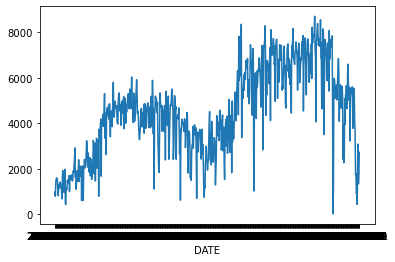

In [6]:
plt.plot(bs["dteday"], bs["cnt"])
plt.xlabel("DATE")
plt.show()

In [7]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
bs["dteday"] = pd.to_datetime(bs["dteday"])

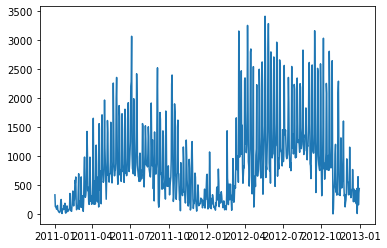

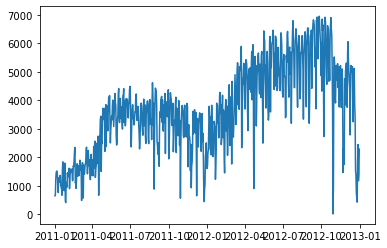

In [9]:
fig = plt.figure()

plt.plot(bs["dteday"], bs["casual"], label = "Casual")
plt.show()

plt.plot(bs["dteday"], bs["registered"], label = "Rgd")
plt.show()

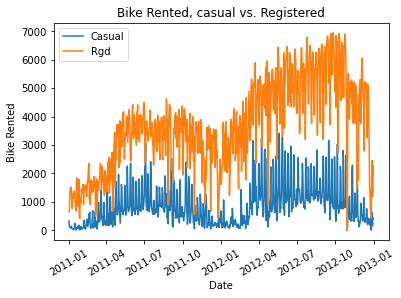

In [11]:
fig = plt.figure()

plt.plot(bs["dteday"], bs["casual"], label = "Casual")
plt.plot(bs["dteday"], bs["registered"], label = "Rgd")
plt.xlabel("Date")
plt.ylabel("Bike Rented")
plt.title("Bike Rented, casual vs. Registered")
plt.xticks(rotation = 30)
plt.legend()
plt.show()

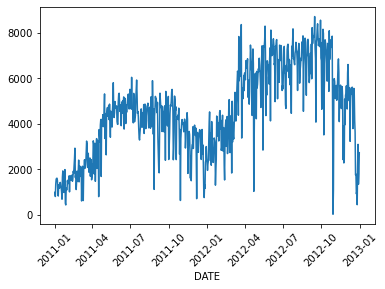

In [13]:
plt.plot(bs["dteday"], bs["cnt"])
plt.xlabel("DATE")
plt.xticks(rotation = 45)
plt.show()

In [ ]:
![image.png](attachment:image.png)

Above, we created a line graph to examine how the total number of bike rentals changed over time.


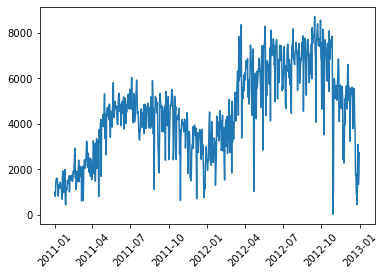

Looking at the entire two-year period, we see the number of rented bikes is at its lowest during the winter months and at its highest during the summer (Capital Bikeshare operates only in the northern hemisphere, so the summer months are June-August, and the winter months are December-February).

In fact, we see quite a few similar patterns for both 2011 and 2012 with respect to the number of rented bikes:

-   The number keeps increasing in the January-May interval.
-   We see a plateau in the May-September interval, where the number of rentals stays high but constant (it neither increases nor decreases very much).
-   The number keeps decreasing in the September-December interval.

We call all of these similarities **seasonal trends**. In time series data, we sometimes see specific patterns occurring regularly at specific intervals of time — we call this **seasonality**.

Weather, holidays, school vacations and other factors can often cause seasonality. One popular example is ice-cream sales seasonality, which we can attribute to variations in air temperature: sales are high during summer and low during winter.

Identifying seasonality can be useful for businesses:

-   They can plan marketing campaigns at the right time.
-   They don't need to panic needlessly when the sales are decreasing as a result of seasonality.
-   They can hire extra employees right before the period of high activity begins.

In our case, what could be causing the seasonality in the number of rented bikes?

Biking is an outdoor activity, and people often don't ride when it's too cold outside — the wind feels very cold when you're moving.

Let's see if we can find any similarity between how air temperature and the number of bikes rented changed over the course of 2 years.

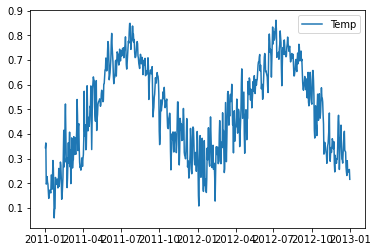

In [16]:
plt.plot(bs["dteday"], bs["temp"], label = "Temp")
# plt.plot(bs["dteday"], bs["cnt"], label = "Bike Rented")
plt.legend()
plt.show()

Above we've plotted `dteday` against `cnt` on a line graph, and we identified a few seasonal trends. We hypothesized that this seasonality might be related to temperature variations.

The similarity in how the air temperature and the number of rented bikes changed over 2011 and 2012 supports this hypothesis.

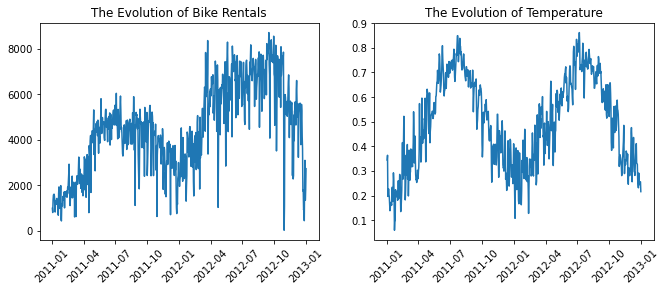

We see that when the temperature grows, the number of bike rentals tends to grow too. When the temperature decreases, the number of rentals tends to decrease too. Although the relationship isn't perfect, the values in the two columns follow similar patterns in how they change.

Above, we plotted `cnt` and `temp` against `dteday`. To visualize the relationship between `cnt` and `temp`, it's better if we plot one against the other, and leave out the `dteday` column. We can do this with a **scatter plot** (also known as **scatter graph** or **scatter chart**).

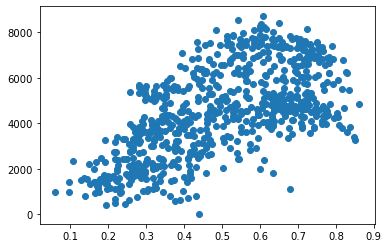

In [19]:
plt.scatter(bs["temp"], bs["cnt"])

plt.show()

One thing we notice in the scatter plot above is that the overall direction of the points is upward (seen from left to right). This is because as the temperature increases, the number of bike rentals tends to grow too.

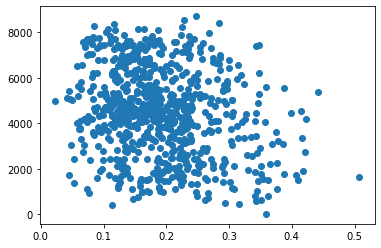

In [20]:
plt.scatter(bs["windspeed"], bs["cnt"])

plt.show()

Above, we generated two scatter plots:

-   `temp` versus `cnt`
-   `windspeed` versus `cnt`

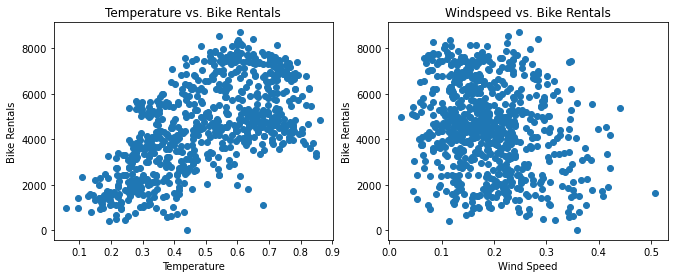

The general direction of the points (seen from left to right) is different on the two plots:

-   `temp` versus `cnt` shows an upward trend
-   `windspeed` versus `cnt` shows a downward trend (approximately)

In a broad sense, when two columns are statistically related in a specific way and to a certain degree, we call this relationship **correlation**.

There are two kinds of correlation: 
* positive and 
* negative.


* Two positively correlated columns tend to change in the same direction — when one increases (or decreases), the other tends to increase (or decrease) as well. 

* Two negatively correlated columns tend to change in opposite directions — when one increases, the other tends to decrease, and vice versa. 

Not all pairs of columns are correlated. We often see two columns changing together in a way that shows no clear pattern. The values in the columns increase and decrease without any correlation.

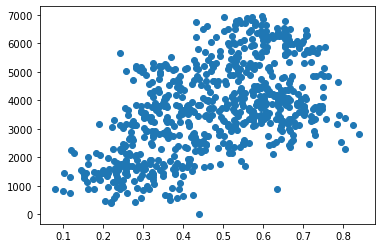

In [21]:
plt.scatter(bs["atemp"], bs["registered"])

plt.show()

The most popular way to measure correlation strength is by calculating the degree to which the points on a scatter plot fit on a straight line.

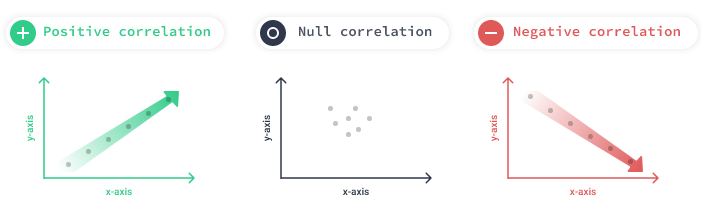

We can measure how well the points fit on a straight line by using the **Pearson correlation coefficient** — also known as **Pearson's r**.

Pearson's r values lie between -1.00 and +1.00. 
* When the positive correlation is perfect, the Pearson's r is equal to +1.00.
* When the negative correlation is perfect, the Pearson's r is equal to -1.00. 
* A value of 0.0 shows no correlation.

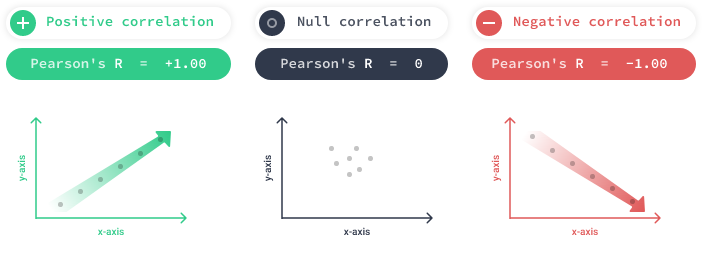

Example of scatter plot shapes along with their corresponding Pearson's r.

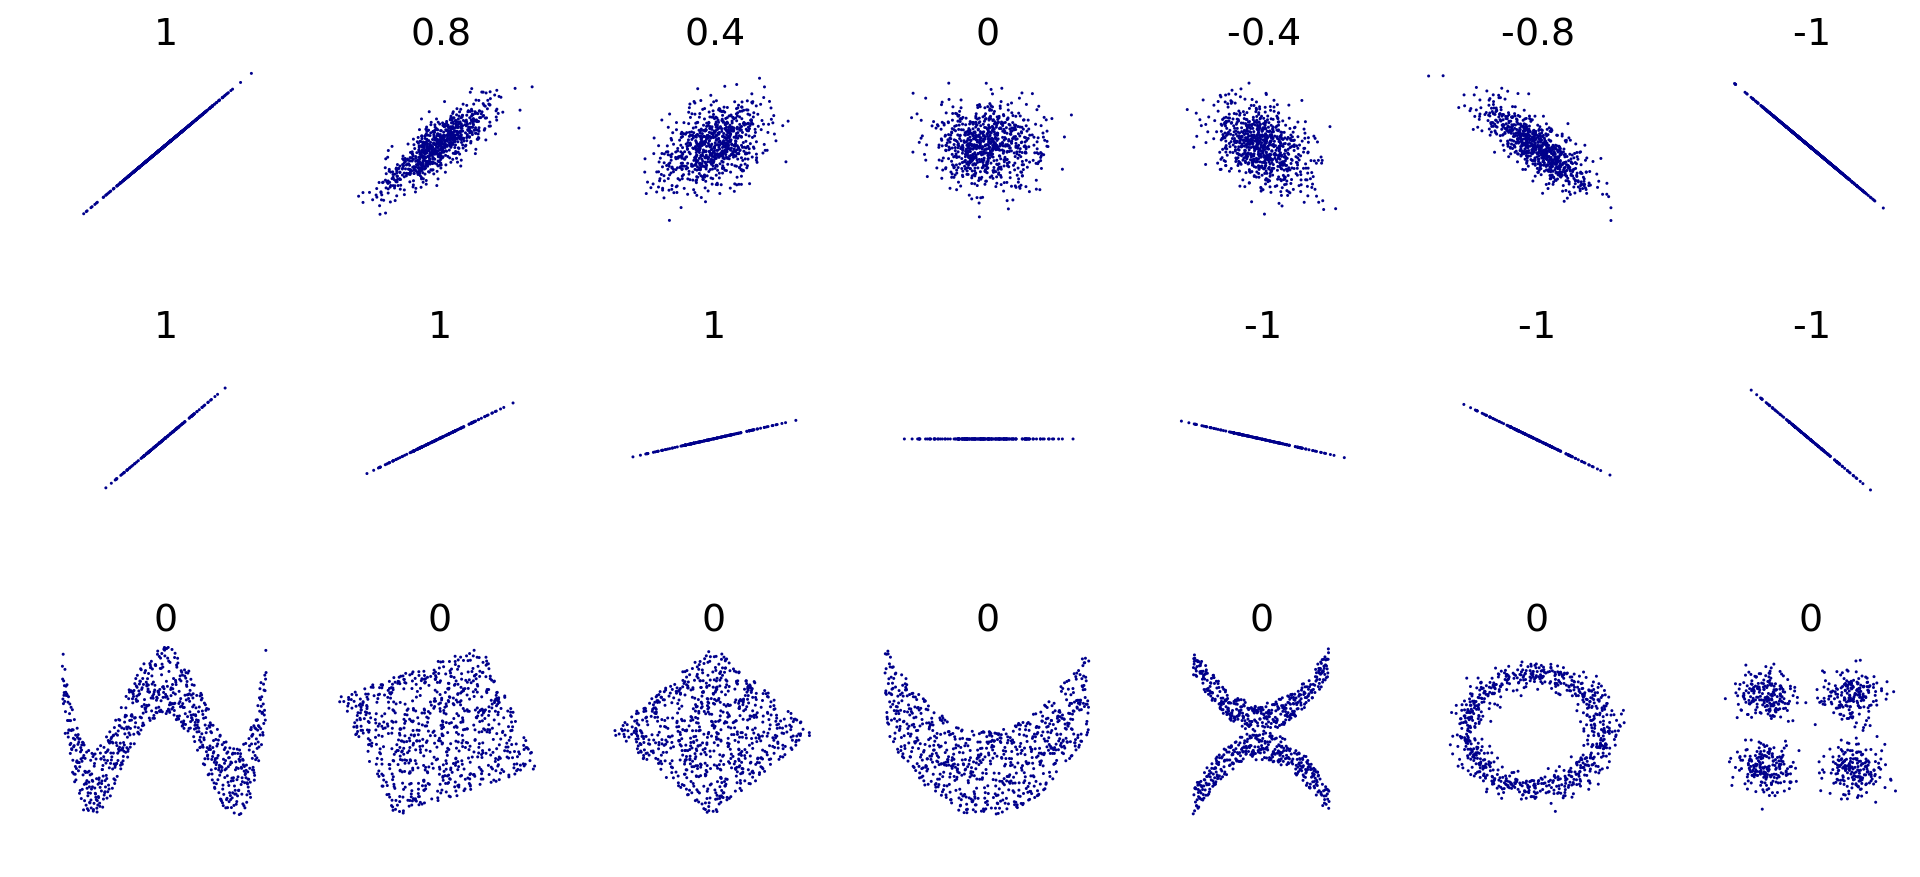

If columns X and Y have *r = +0.8*, and columns X and Z have *r = -0.8*, then the strength of these two correlations is equal. The minus sign only tells us that the correlation is negative, not that it is weaker.

For example, even though the number +0.2 is greater than -0.6, a -0.6 correlation is stronger compared to a +0.2 correlation.

When we compare correlation strengths, we need to ignore the signs and only look at the absolute *r* values. The sign only gives us the correlation's direction, not its strength.

Note that Pearson's r as a way to measure the strength of a correlation.

To calculate the Pearson's r between any two columns, we can use the [`Series.corr()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.corr.html).

In [22]:
bs["temp"].corr(bs["cnt"])

0.6274940090334918

In [23]:
bs["windspeed"].corr(bs["cnt"])

-0.23454499742167

In [25]:
bs["cnt"].corr(bs["windspeed"])

-0.23454499742167

In [26]:
bs["dteday"].corr(bs["windspeed"])

TypeError: reduction operation 'corr' not allowed for this dtype

The order of columns doesn't matter when we use `Series.corr()`.

`Series.corr()` uses a math formula that only works with numbers. This means that `Series.corr()` only works with numerical columns — if we use string or datetime columns, we'll get an error.


The `Series.corr()` method only allows us to calculate the correlation between two numerical columns. We can get an overview of correlations using the [`DataFrame.corr()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html), which calculates the Pearson's r between all pairs of numerical columns.

In [27]:
bs.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


In [29]:
bs.corr()[["cnt", "temp", "windspeed"]]

,cnt,temp,windspeed
instant,0.628830,0.150580,-0.112620
season,0.406100,0.334315,-0.229046
yr,0.566710,0.047604,-0.011817
mnth,0.279977,0.220205,-0.207502
holiday,-0.068348,-0.028556,0.006292
weekday,0.067443,-0.000170,0.014282
workingday,0.061156,0.052660,-0.018796
weathersit,-0.297391,-0.120602,0.039511
temp,0.627494,1.000000,-0.157944
atemp,0.631066,0.991702,-0.183643


Generally, numerical columns describe a quantity — how much there is of something.

But we also have columns that describe qualities — what or how something is. These columns are **categorical** (or qualitative).

In [30]:
bs["workingday"].value_counts()

1    500
0    231
Name: workingday, dtype: int64

Because it's encoded with numbers, we can calculate correlations using `Series.corr()`.

In [33]:
bs.corr()["workingday"][["casual"
                         , "registered"]]

casual       -0.518044
registered    0.303907
Name: workingday, dtype: float64

We can see a negative correlation with the `casual` column (-0.52), and a positive correlation with the `registered` column (+0.30).

These values suggest that registered users tend to use the bikes more on working days (to commute to work probably), while casual (non-registered) users tend to rent the bikes more on the weekends and holidays (maybe to spend some leisure time).

However, the `1` and `0` encoding is arbitrary.

After we changed `1` to `0` and vice versa, the correlation strengths remained the same, but their sign changed (minus becomes plus and vice versa):

If we are careful about what `1` and `0` mean, we reach the same conclusion as above (registered users tend to use the bikes more on working days, while casual users tend to ride the bikes more on the weekends and holidays).

**Special Note:** when we're working with categorical columns that have been encoded with numbers, we need to interpret the sign of the correlation with caution.

`weathersit` column, which is categorical and has four unique values describing the weather:

-   `1`: clear or few clouds
-   `2`: mist or cloudy
-   `3`: light rain, light snow, thunderstorm
-   `4`: heavy rain, snow, ice pellets, fog

When we find a strong correlation between two columns, one common mistake is to assume that the columns must also have a relationship of causality — one is the cause, and the other is the effect.

For instance, we found a strong positive correlation between the number of bike rentals and ice cream sales. When the number of bike rentals goes up, the number of ice cream sales tends to go up as well. When bike rentals decrease, ice cream sales tend to decrease too.

The positive correlation doesn't imply that ice cream sales are causing bike rentals to increase or decrease (or vice versa). Most likely, both ice cream sales and bike rentals are related to temperature variations in a similar way, and this is why they change together similarly.

However, correlation can suggest causality. If two columns are correlated, it might be because of a cause-and-effect relationship. It might. To establish a relationship of causality, we often need to perform a rigorous experiment.

The key point is that proving causality requires more than just correlation. We can't say that X is the cause of Y simply because columns X and Y are strongly correlated. In other words, correlation does not imply causation.